In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import json
import os
import re

In [44]:
def parse_name(full_name):
    """gets a better name """
    splits = full_name.split('-')
    return splits[2][:2] + '-' + splits[2][2:]

def load(directory, subsample=None):
    """load up the data, parse the names into something more graph approps"""
    file_names = os.listdir(directory)
    file_names = [os.path.join(directory, fname) for fname in file_names]
    all_data = {}
    for fname in file_names:
        with open(fname) as f:
            data = np.array(json.load(f))
            print(data.shape)
            if np.any(data[:, 1] > 250000):
                data = data[data[:, 1] <= 250000]
        if subsample:
            data = data[::subsample,...]
        name = parse_name(os.path.basename(fname))
        all_data[name] = data
    return all_data
        

In [60]:
def do_plot(data):
    plt.figure(figsize=(5, 5))
    for name in sorted(data, key=lambda x: int(x[3:])):
        plt.plot(data[name][:, 1], data[name][:, 2], label=name)
        plt.legend()
    plt.xlabel('Training Step')
    plt.ylabel('Mean Squared Error')
    plt.title('Training loss, target tt-rank 16')

(1000, 3)
(1000, 3)
(1000, 3)
(1000, 3)
(1000, 3)
(1000, 3)
(1000, 3)


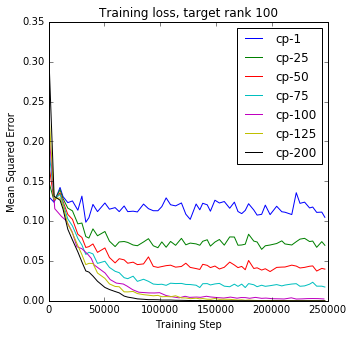

In [54]:
do_plot(load('approx_graphs_data/cp-cp/', subsample=16))

(1000, 3)
(1000, 3)
(1000, 3)
(1000, 3)
(1000, 3)
(1000, 3)
(1000, 3)


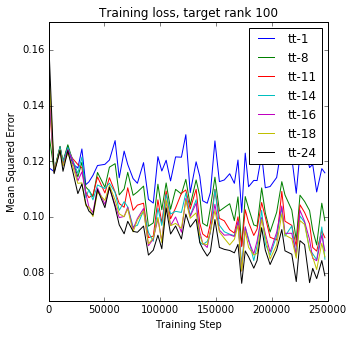

In [55]:
do_plot(load('approx_graphs_data/cp-tt/', subsample=16))

(1000, 3)
(1000, 3)
(1000, 3)
(1000, 3)
(1000, 3)
(1000, 3)
(1000, 3)


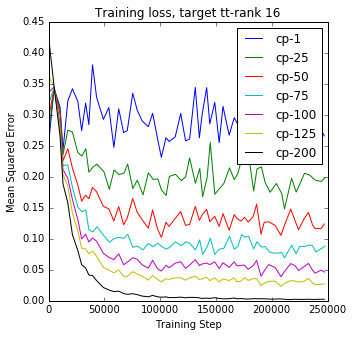

In [61]:
do_plot(load('approx_graphs_data/tt-cp/', subsample=16))

(1000, 3)
(1000, 3)
(1000, 3)
(1000, 3)
(1000, 3)
(1000, 3)
(1000, 3)


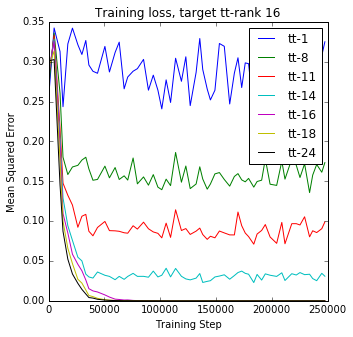

In [62]:
do_plot(load('approx_graphs_data/tt-tt/', subsample=16))